Here we follow a procedure outlined in matlab code by P Link, who followed excel worksheets by A Ambrose and Burgess et al Tree Phys. 2001

$$V_h = \frac{k}{x}ln(v_1/v_2)3600$$  - Eq. 2, Burgss et al, from Marshall 1958

Where $V_h$ = heat pulse velocity (which is reported in cm/hour from ICT loggers) (L/T)

$k$ is thermal diffusivity of green (fresh) wood

$x$ is distance (L) between heater and either temperature probe

$v_1$ and $v_2$ are increases in temperature (from initial temperatures) at equidistant points downstream and upstream, respectively, x cm from the heater.

x is typically 0.6 cm; k is assigned nominal value of 2.5 x 10^-3 cm^2 s^-1; value adjusted after measurement

At $V_h$ = 0, which can be imposed by:

1) severing xylem

2) assuming 0 predawn, 92-95% humidity


$$x_2 = \sqrt{4 kt ln(v_1/v_2)+x_1^2}$$

-Eq. 3, Burgess et al 2001

Where $x_2$ denotes the incorrectly spaced probe, and  $x_1$ is assumed to be correctly spaced at 0.6 m, and t is measurement time

In [2]:
import numpy as np
# parameters
k = 2.5e-3; # thermal diffusivity of fresh wood, cm^2/s, from Burgess 2001 - preliminary estimate, should be refined with measurements
t = 80; # 80 seconds measurement time, from p.591 in Burgess 2001
xnom = 0.6; # nominal probe spacing, in cm


In [3]:
zeroavg = -3 #cm/h
lnv1v2 = zeroavg*xnom/k/3600;


In [4]:
x1 = np.sqrt(xnom**2-4*k*t*lnv1v2);
x2 = -np.sqrt(4*k*t*lnv1v2+xnom**2);
print x1, x2

0.721110255093 -0.4472135955


In [5]:
vrange = np.linspace(0,20,200);
lnv1v2 = vrange*xnom/3600/k;


In [12]:
veloc1s = (4*k*t*lnv1v2-(-xnom)**2+x1**2)*3600/(2*t*(x1-(-xnom)));
veloc2s = (4*k*t*lnv1v2-(x2)**2+xnom**2)*3600/(2*t*(xnom-x2));

vrange_corr = (veloc1s+veloc2s)/2;

p = np.polyfit(vrange,vrange_corr,1);
slope_shallow = p[0];
int_shallow = p[1];


In [13]:
correctedVelocities = originalVelocities * slope + intercept

NameError: name 'originalVelocities' is not defined

AttributeError: 'list' object has no attribute 'set_ylabel'

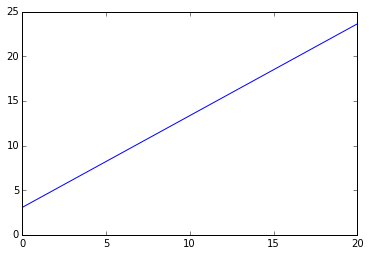

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = plt.plot(vrange, vrange_corr)
#ax = plt.plot(np.linspace(1,20,20), slope*20 + )
ax.set_xlabel('raw')
ax.set_ylabel('corrected')